In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Non Graphical EDA

We analyze categorical and quantitative variables using some basic and statistical techniques and generate insights

##### Categorical Variables
We have only one categorical variable which is species. So we can do a value_counts and look for how many levels of the categorical variable is present and what is the proportion of different levels of cardinality. We can see that this a perfect balanced dataset. However this might not be the case in the real world often

In [4]:
print(df['species'].value_counts())
df['species'].value_counts()/len(df['species'])

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


versicolor    0.333333
virginica     0.333333
setosa        0.333333
Name: species, dtype: float64

##### Numeric Variables

The way to generate non-graphical EDA is to analyze mean, median, mode for central tendancy. 
Variance, Standard Deviation and IQR for spread
Skewness and kurtosis etc...

In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Univariate Graphical EDA

This does not apply for categorical variables. We can use histograms to analyze distribution, pdf, cdf, boxplots and qq plots

Text(0.5, 0, 'petal width')

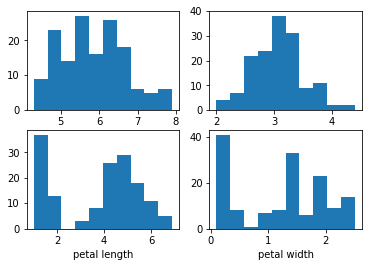

In [6]:
plt.subplot(2,2,1)
plt.hist(df['sepal_length'],bins=10)
plt.xlabel('sepal length')
plt.subplot(2,2,2)
plt.hist(df['sepal_width'],bins=10)
plt.xlabel('sepal width')
plt.subplot(2,2,3)
plt.hist(df['petal_length'],bins=10)
plt.xlabel('petal length')
plt.subplot(2,2,4)
plt.hist(df['petal_width'],bins=10)
plt.xlabel('petal width')

Text(0.5, 0, 'petal width')

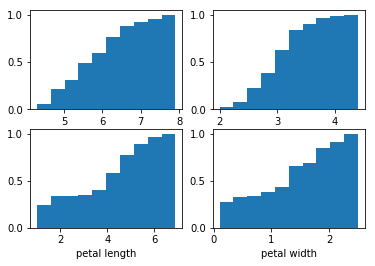

In [54]:
plt.subplot(2,2,1)
plt.hist(df['sepal_length'],density=True,cumulative=True)
plt.xlabel('sepal length')
plt.subplot(2,2,2)
plt.hist(df['sepal_width'],density=True,cumulative=True)
plt.xlabel('sepal width')
plt.subplot(2,2,3)
plt.hist(df['petal_length'],density=True,cumulative=True)
plt.xlabel('petal length')
plt.subplot(2,2,4)
plt.hist(df['petal_width'],density=True,cumulative=True)
plt.xlabel('petal width')

Text(0.5, 0, 'petal width')

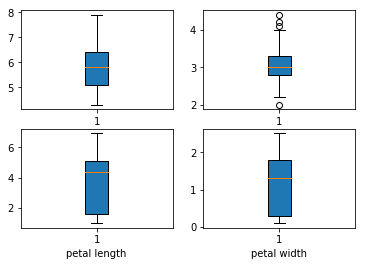

In [8]:
plt.subplot(2,2,1)
plt.boxplot(df['sepal_length'],patch_artist=True)
plt.xlabel('sepal length')
plt.subplot(2,2,2)
plt.boxplot(df['sepal_width'],patch_artist=True)
plt.xlabel('sepal width')
plt.subplot(2,2,3)
plt.boxplot(df['petal_length'],patch_artist=True)
plt.xlabel('petal length')
plt.subplot(2,2,4)
plt.boxplot(df['petal_width'],patch_artist=True)
plt.xlabel('petal width')

In [9]:
from pandas.api.types import is_float_dtype
from collections import defaultdict
#from scipy.stats import iqr
outliers=defaultdict(list)
num_list=list()
for col in df.columns:
    if(is_float_dtype(df[col])):
        num_list.append(col)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        #q75, q25 = iqr(df[col])
        #iqr = q75 - q25
        print(col, ":" ,IQR)
        #for i in range(0,len(num_list)+1):
        for index, row in df.iterrows():
            if((row[col]<(Q1-1.5*IQR)) or (row[col]>(Q3+1.5*IQR))):
                    outliers[col].append(row[col])
                #else:
                    
print(outliers)

sepal_length : 1.3000000000000007
sepal_width : 0.5
petal_length : 3.4999999999999996
petal_width : 1.5
defaultdict(<class 'list'>, {'sepal_width': [4.4, 4.1, 4.2, 2.0]})


In [10]:
for key,value in outliers.items():
    for i in value:
        print(i)

4.4
4.1
4.2
2.0


In [11]:
Q1 = df['petal_width'].quantile(0.25)
Q3 = df['petal_width'].quantile(0.75)
IQR = Q3 - Q1
IQR

1.5

C:\Users\udays\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, 'petal width')

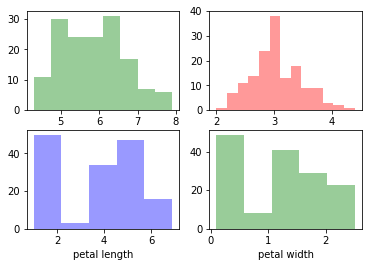

In [12]:
plt.subplot(2,2,1)
sns.distplot(df['sepal_length'],kde=False,color='g')
plt.xlabel('sepal length')
plt.subplot(2,2,2)
sns.distplot(df['sepal_width'],kde=False,color='r')
plt.xlabel('sepal width')
plt.subplot(2,2,3)
sns.distplot(df['petal_length'],kde=False,color='b')
plt.xlabel('petal length')
plt.subplot(2,2,4)
sns.distplot(df['petal_width'],kde=False,color='g')
plt.xlabel('petal width')

Text(0.5, 0, 'petal width')

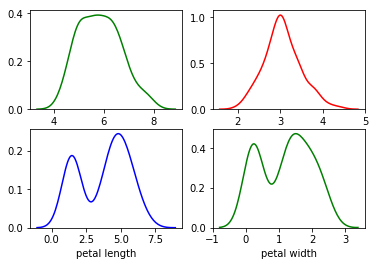

In [13]:
plt.subplot(2,2,1)
sns.distplot(df['sepal_length'],hist=False,kde=True,color='g')
plt.xlabel('sepal length')
plt.subplot(2,2,2)
sns.distplot(df['sepal_width'],hist=False,kde=True,color='r')
plt.xlabel('sepal width')
plt.subplot(2,2,3)
sns.distplot(df['petal_length'],hist=False,kde=True,color='b')
plt.xlabel('petal length')
plt.subplot(2,2,4)
sns.distplot(df['petal_width'],hist=False,kde=True,color='g')
plt.xlabel('petal width')

##### Univariate Analysis for each species
The following code is used to visualize how many data points we have for each species and how their sepal lengths are alligned

In [4]:
df_setosa=df[df['species']=='setosa']
df_virginica=df[df['species']=='virginica']
df_versicolor=df[df['species']=='versicolor']

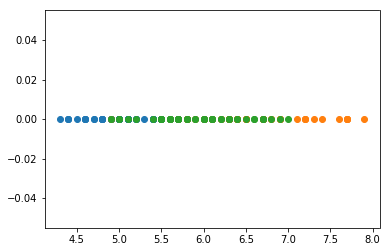

In [10]:
plt.plot(df_setosa['sepal_length'],np.zeros_like(df_setosa['sepal_length']),'o')
plt.plot(df_virginica['sepal_length'],np.zeros_like(df_setosa['sepal_length']),'o')
plt.plot(df_versicolor['sepal_length'],np.zeros_like(df_setosa['sepal_length']),'o')
plt.show()

##### Non-Graphical Multivariate EDA

In this section we will see how to deal with categorical variables by performing a groupby operation and deriving useful statistics of the numerical variables for each class of the categorical variable

In [29]:
#df2.groupby([col,'output'])['output'].agg(['count'])
for col in df.columns:
    if(is_float_dtype(df[col])):
        new_df=df.groupby(['species'])[col].agg(['count','sum','mean','median'])
#new_df=df.groupby(['species'])['sepal_length','sepal_width','petal_length','petal_width'].agg(['count','sum','mean','median'])
#new_df=new_df.reset_index()
        print(new_df)

            count    sum   mean  median
species                                
setosa         50  250.3  5.006     5.0
versicolor     50  296.8  5.936     5.9
virginica      50  329.4  6.588     6.5
            count    sum   mean  median
species                                
setosa         50  170.9  3.418     3.4
versicolor     50  138.5  2.770     2.8
virginica      50  148.7  2.974     3.0
            count    sum   mean  median
species                                
setosa         50   73.2  1.464    1.50
versicolor     50  213.0  4.260    4.35
virginica      50  277.6  5.552    5.55
            count    sum   mean  median
species                                
setosa         50   12.2  0.244     0.2
versicolor     50   66.3  1.326     1.3
virginica      50  101.3  2.026     2.0


##### Bivariate Analysis
Bivariate Analysis is rarely used in EDA as we have many features we are often interested in multivariate analysis which is often done through series of bivariate analysis

C:\Users\udays\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


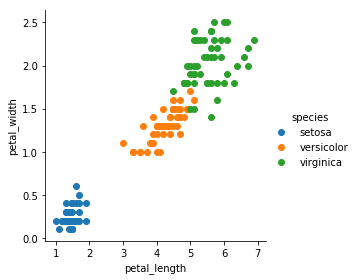

In [14]:
sns.FacetGrid(df,hue='species',size=4).map(plt.scatter,'petal_length','petal_width').add_legend()
plt.show()

C:\Users\udays\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


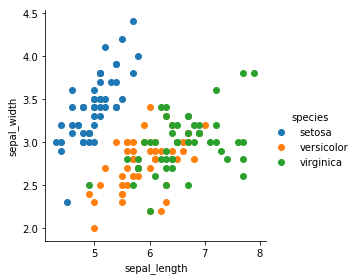

In [15]:
sns.FacetGrid(df,hue='species',size=4).map(plt.scatter,'sepal_length','sepal_width').add_legend()
plt.show()

##### Multivariate Graphical EDA
In this we will analyze the various features using pairplots which gives us intuition about how the features vary with respect to each other for each level of category

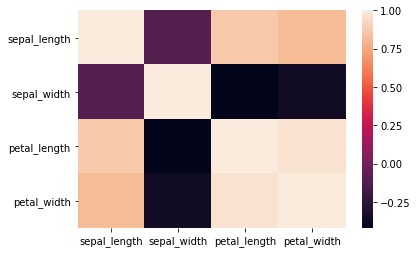

In [41]:
sns.heatmap(df.corr())

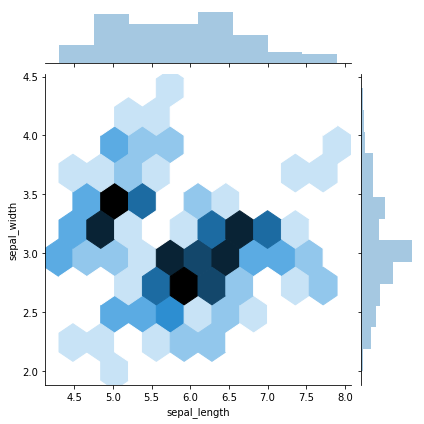

In [43]:
sns.jointplot('sepal_length','sepal_width',data=df,kind="hex")

C:\Users\udays\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\udays\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


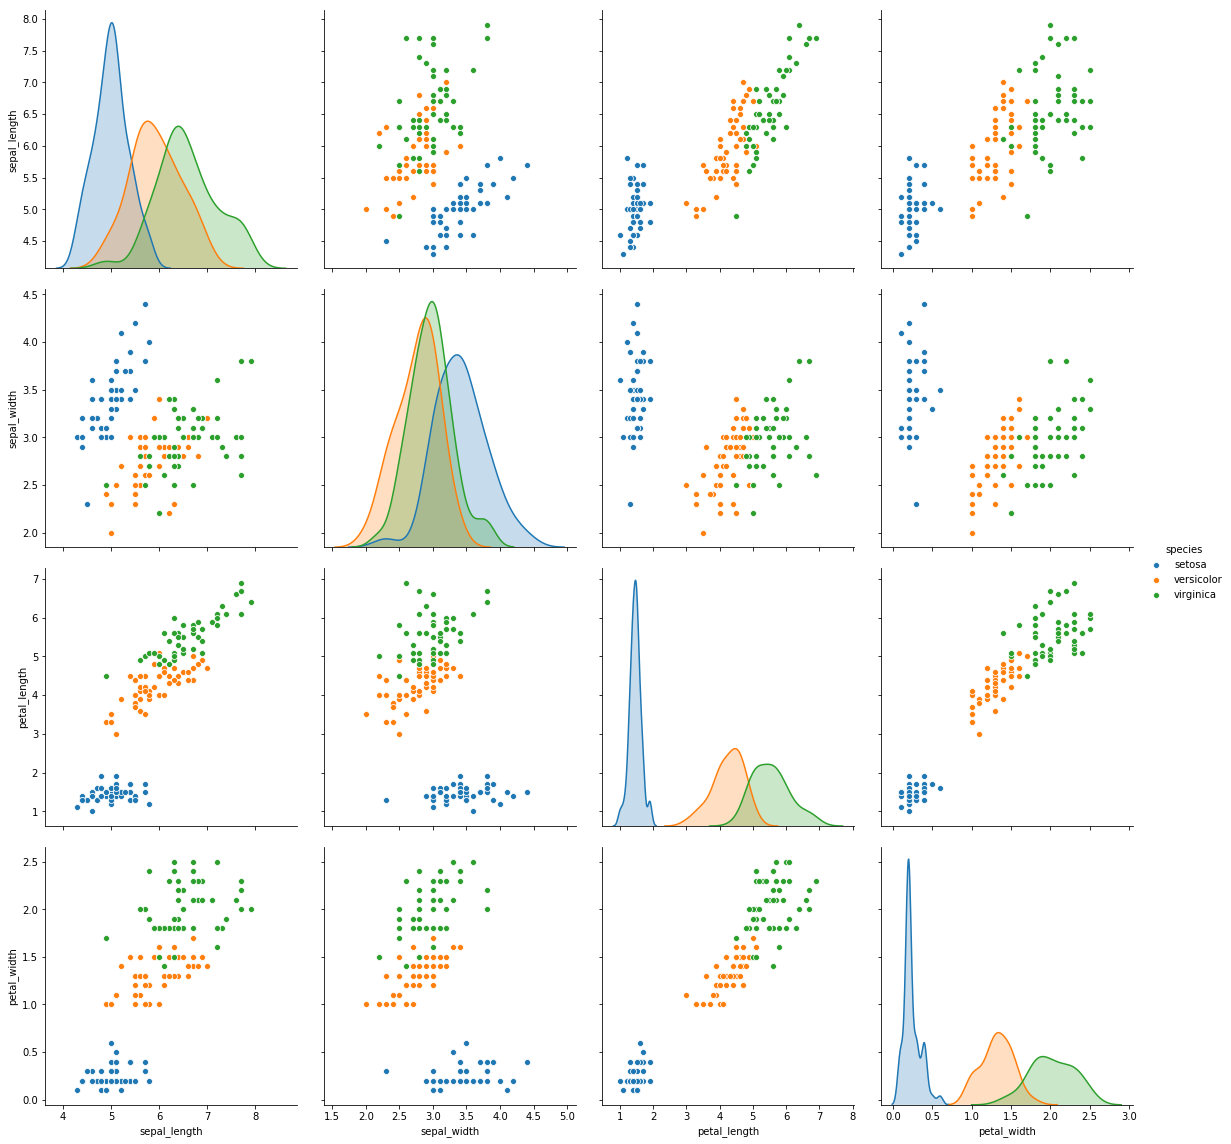

In [16]:
sns.pairplot(df,hue='species',size=4)
plt.show()

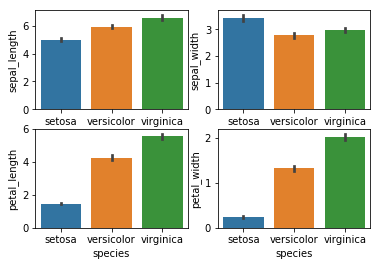

In [35]:
plt.subplot(2,2,1)
sns.barplot(x=df['species'],y=df['sepal_length'])
plt.subplot(2,2,2)
sns.barplot(x=df['species'],y=df['sepal_width'])
plt.subplot(2,2,3)
sns.barplot(x=df['species'],y=df['petal_length'])
plt.subplot(2,2,4)
sns.barplot(x=df['species'],y=df['petal_width'])

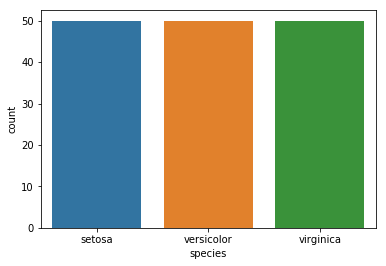

In [40]:
#plt.subplot(2,2,1)
sns.countplot(x=df['species'],data=df)

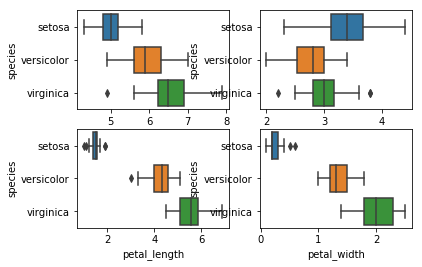

In [50]:
plt.subplot(2,2,1)
sns.boxplot(x='sepal_length',y='species',data=df)
plt.subplot(2,2,2)
sns.boxplot(x='sepal_width',y='species',data=df)
plt.subplot(2,2,3)
sns.boxplot(x='petal_length',y='species',data=df)
plt.subplot(2,2,4)
sns.boxplot(x='petal_width',y='species',data=df)

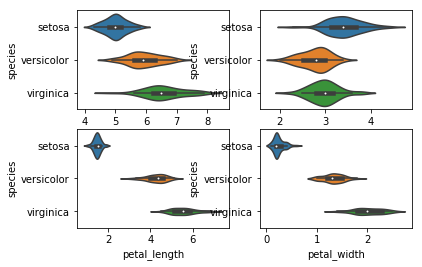

In [49]:
plt.subplot(2,2,1)
sns.violinplot(x='sepal_length',y='species',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='sepal_width',y='species',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='petal_length',y='species',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='petal_width',y='species',data=df)

In [53]:
a=list()
for i in range(2000,3201):
    if i%7==0 and i%5!=0:
        a.append(i)
print(a)

[2002, 2009, 2016, 2023, 2037, 2044, 2051, 2058, 2072, 2079, 2086, 2093, 2107, 2114, 2121, 2128, 2142, 2149, 2156, 2163, 2177, 2184, 2191, 2198, 2212, 2219, 2226, 2233, 2247, 2254, 2261, 2268, 2282, 2289, 2296, 2303, 2317, 2324, 2331, 2338, 2352, 2359, 2366, 2373, 2387, 2394, 2401, 2408, 2422, 2429, 2436, 2443, 2457, 2464, 2471, 2478, 2492, 2499, 2506, 2513, 2527, 2534, 2541, 2548, 2562, 2569, 2576, 2583, 2597, 2604, 2611, 2618, 2632, 2639, 2646, 2653, 2667, 2674, 2681, 2688, 2702, 2709, 2716, 2723, 2737, 2744, 2751, 2758, 2772, 2779, 2786, 2793, 2807, 2814, 2821, 2828, 2842, 2849, 2856, 2863, 2877, 2884, 2891, 2898, 2912, 2919, 2926, 2933, 2947, 2954, 2961, 2968, 2982, 2989, 2996, 3003, 3017, 3024, 3031, 3038, 3052, 3059, 3066, 3073, 3087, 3094, 3101, 3108, 3122, 3129, 3136, 3143, 3157, 3164, 3171, 3178, 3192, 3199]


In [45]:
f=input("Enter first name:")
l=input("Enter last name:")
print(l+" "+f)

Enter first name:uday
Enter last name:sai
sai uday


In [51]:
name=input("Enter full name by space:")
a=name.split(" ")
#print(a[0])
print(a[1]+" "+a[0])

Enter full name by space:uday sai
sai uday


In [63]:
import math
d=12
r=d/2
print(round((4/3)*math.pi*(r**3),2))

904.78


In [64]:
g = input("Enter your name : ") 
print(g[::-1])

Enter your name : AcadGlid
dilGdacA


In [43]:
a=list()
g = int(input("Enter total numbers : "))
for i in range(0,g):
    b=int(input())
    a.append(b)
print(a)

Enter your name : 10
55
50
59
45
86
99
1000000
66666
999999
00000000
[55, 50, 59, 45, 86, 99, 1000000, 66666, 999999, 0]


In [26]:
n=10
for i in range(1,n):
    if(i<=5):
        print(i*"*")
    else:
        print((n-i)*"*")

*
**
***
****
*****
****
***
**
*


In [1]:
a=[1,2,3,4,5]
b=[6,7,8,9,10]
c=[11,12,13,14,15]
zipped=zip(a,b,c)
for i in range(0,3):
    print(i)
    for j in list(zipped):
        print(j)

0
(1, 6, 11)
(2, 7, 12)
(3, 8, 13)
(4, 9, 14)
(5, 10, 15)
1
2
